<a href="https://colab.research.google.com/github/abyanjan/Anamoly-Detection-with-Autoencoders/blob/master/Anamoly_Detection_with_AutoEncoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ANAMOLY DETECTION WITH AUTOENCODERS AND TENSORFLOW

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Model

### Data  

The data is downloaded from http://www.timeseriesclassification.com/description.php?Dataset=ECG5000

Data contains information on normal and abnormal activities of heart.

In [ ]:
# DATA
!wget http://www.timeseriesclassification.com/Downloads/ECG5000.zip

--2021-05-09 09:45:37--  http://www.timeseriesclassification.com/Downloads/ECG5000.zip
Resolving www.timeseriesclassification.com (www.timeseriesclassification.com)... 109.123.71.232
Connecting to www.timeseriesclassification.com (www.timeseriesclassification.com)|109.123.71.232|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10614407 (10M) [application/zip]
Saving to: ‘ECG5000.zip’

ECG5000.zip         100%[===================>]  10.12M  10.6MB/s    in 1.0s    

2021-05-09 09:45:39 (10.6 MB/s) - ‘ECG5000.zip’ saved [10614407/10614407]



In [ ]:
!unzip ECG5000.zip

Archive:  ECG5000.zip
  inflating: ECG5000.txt             
  inflating: ECG5000_TEST.arff       
  inflating: ECG5000_TEST.txt        
  inflating: ECG5000_TRAIN.arff      
  inflating: ECG5000_TRAIN.txt       
  inflating: ECG5000_TEST.ts         
  inflating: ECG5000_TRAIN.ts        


In [ ]:
!ls -alrt

total 36800
-rw-r--r-- 1 root root 10614407 Aug  9  2019 ECG5000.zip
-rw-r--r-- 1 root root       38 Aug  9  2019 ECG5000.txt
-rw-r--r-- 1 root root  7086857 Aug  9  2019 ECG5000_TEST.arff
-rw-r--r-- 1 root root  1128500 Aug  9  2019 ECG5000_TRAIN.txt
-rw-r--r-- 1 root root   790229 Aug  9  2019 ECG5000_TRAIN.arff
-rw-r--r-- 1 root root 10156500 Aug  9  2019 ECG5000_TEST.txt
-rw-r--r-- 1 root root  7083409 Aug  9  2019 ECG5000_TEST.ts
-rw-r--r-- 1 root root   786781 Aug  9  2019 ECG5000_TRAIN.ts
drwxr-xr-x 4 root root     4096 May  6 13:43 .config
drwxr-xr-x 1 root root     4096 May  6 13:44 sample_data
drwxr-xr-x 1 root root     4096 May  9 09:44 ..
drwxr-xr-x 1 root root     4096 May  9 09:45 .


In [ ]:
# using ECG5000_TRAIN.txt and  ECG5000_TEST.txt
# concatenate both files to a single file
!cat ECG5000_TRAIN.txt ECG5000_TEST.txt > ecg_final.txt

In [ ]:
!head ecg_final.txt

   1.0000000e+00  -1.1252183e-01  -2.8272038e+00  -3.7738969e+00  -4.3497511e+00  -4.3760410e+00  -3.4749863e+00  -2.1814082e+00  -1.8182865e+00  -1.2505219e+00  -4.7749208e-01  -3.6380791e-01  -4.9195659e-01  -4.2185509e-01  -3.0920086e-01  -4.9593870e-01  -3.4211867e-01  -3.5533627e-01  -3.6791303e-01  -3.1650279e-01  -4.1237405e-01  -4.7167181e-01  -4.1345783e-01  -3.6461703e-01  -4.4929829e-01  -4.7141866e-01  -4.2477658e-01  -4.6251673e-01  -5.5247236e-01  -4.7537519e-01  -6.9420000e-01  -7.0186810e-01  -5.9381178e-01  -6.6068415e-01  -7.1383066e-01  -7.6980688e-01  -6.7228161e-01  -6.5367605e-01  -6.3940562e-01  -5.5930228e-01  -5.9167032e-01  -4.9322332e-01  -4.6305183e-01  -3.0164382e-01  -2.3273401e-01  -1.2505488e-01  -1.5394314e-01  -2.4357404e-02  -6.5608758e-02   3.4999258e-02   6.1935219e-02   7.1195420e-02   1.2392505e-01   1.0312371e-01   2.2522849e-01   1.2868305e-01   3.0248315e-01   2.5727621e-01   1.9635161e-01   1.7938297e-01   2.4472863e-01   3.4121687e-01   3.282

In [ ]:
# read data as data frame
df = pd.read_csv('ecg_final.txt', sep="  ", header=None)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140
0,1.0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818287,-1.250522,-0.477492,-0.363808,-0.491957,-0.421855,-0.309201,-0.495939,-0.342119,-0.355336,-0.367913,-0.316503,-0.412374,-0.471672,-0.413458,-0.364617,-0.449298,-0.471419,-0.424777,-0.462517,-0.552472,-0.475375,-0.694200,-0.701868,-0.593812,-0.660684,-0.713831,-0.769807,-0.672282,-0.653676,-0.639406,-0.559302,...,1.173345,1.258179,1.433789,1.700533,1.999043,2.125341,1.993291,1.932246,1.797437,1.522284,1.251168,0.998730,0.483722,0.023132,-0.194914,-0.220917,-0.243737,-0.254695,-0.291136,-0.256490,-0.227874,-0.322423,-0.289286,-0.318170,-0.363654,-0.393456,-0.266419,-0.256823,-0.288694,-0.162338,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137
1,1.0,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,0.148951,0.183527,0.294876,0.190233,0.235575,0.253487,0.221742,0.050233,0.178042,0.139563,0.046794,0.043007,0.106544,0.012654,0.003995,0.045724,-0.045999,-0.072667,-0.071078,-0.153866,-0.227254,-0.249270,-0.253489,-0.332835,-0.264330,-0.345825,-0.310781,-0.334160,-0.306178,...,1.557410,1.808428,2.164346,2.070747,1.903614,1.764455,1.507769,1.293428,0.894562,0.578016,0.244343,-0.286443,-0.515881,-0.732707,-0.832465,-0.803318,-0.836252,-0.777865,-0.774753,-0.733404,-0.721386,-0.832095,-0.711982,-0.751867,-0.757720,-0.853120,-0.766988,-0.688161,-0.519923,0.039406,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250
2,1.0,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490658,-1.183580,-0.394229,-0.282897,-0.356926,-0.287297,-0.399489,-0.473244,-0.379048,-0.399039,-0.178594,-0.339522,-0.498447,-0.337251,-0.425480,-0.423952,-0.463170,-0.493253,-0.549749,-0.529831,-0.530935,-0.502365,-0.417368,-0.526346,-0.471005,-0.676784,-0.898612,-0.610571,-0.530164,-0.765674,-0.581937,-0.537848,...,1.640105,1.810988,2.185398,2.262985,2.052920,1.890488,1.793033,1.564784,1.234619,0.900302,0.551957,0.258222,-0.128587,-0.092585,-0.168606,-0.495989,-0.395034,-0.328238,-0.448138,-0.268230,-0.456415,-0.357867,-0.317508,-0.434112,-0.549203,-0.324615,-0.268082,-0.220384,-0.117429,0.614059,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797
3,1.0,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,-0.183319,-0.101657,-0.273874,-0.127818,-0.195983,-0.213523,-0.176473,-0.156932,-0.149172,-0.181510,-0.180074,-0.246151,-0.274260,-0.140960,-0.277449,-0.382549,-0.311937,-0.360093,-0.405968,-0.571433,-0.524106,-0.537886,-0.606778,-0.661446,-0.683375,-0.746683,-0.635662,-0.625231,-0.540094,...,1.553079,1.772155,2.000769,1.925003,1.898426,1.720953,1.501711,1.422492,1.023225,0.776341,0.504426,0.056382,-0.233161,-0.406388,-0.327528,-0.460868,-0.402536,-0.345752,-0.354206,-0.439959,-0.425326,-0.439789,-0.451835,-0.395926,-0.448762,-0.391789,-0.376307,-0.461069,-0.253524,0.213006,0.491173,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564
4,1.0,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,-0.298107,-0.428928,-0.491351,-0.361304,-0.339296,-0.324952,-0.290113,-0.363051,-0.525684,-0.597423,-0.575523,-0.567503,-0.504555,-0.618406,-0.682814,-0.743849,-0.815588,-0.826902,-0.782374,-0.929462,-0.999672,-1.060969,-1.007877,-1.028735,-1.122629,-1.028650,-1.046515,-1.063372,-1.122423,...,0.982230,1.155363,1.336254,1.627534,1.717594,1.696487,1.741686,1.674078,1.546928,1.331738,1.110168,0.922210,0.521777,0.154852,-0.123861,-0.202998,-0.247956,-0.219122,-0.214695,-0.319215,-0.198597,-0.151618,-0.129593,-0.074939,-0.1

In [ ]:
df.shape

(5000, 141)

In [ ]:
# changing column names
df.columns

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            131, 132, 133, 134, 135, 136, 137, 138, 139, 140],
           dtype='int64', length=141)

In [ ]:
df = df.add_prefix('C')
df.columns

Index(['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9',
       ...
       'C131', 'C132', 'C133', 'C134', 'C135', 'C136', 'C137', 'C138', 'C139',
       'C140'],
      dtype='object', length=141)

In [ ]:
# 'C0' is the target feature
df['C0'].value_counts()

1.0    2919
2.0    1767
4.0     194
3.0      96
5.0      24
Name: C0, dtype: int64

 We will be treating data points with label 1 as normal and rest as anamoly for the analysis.

In [ ]:
# 1 is normal acitivity and rest are abnormal activities

In [ ]:
# train test split
train_df, test_df, train_labels, test_labels = train_test_split(df, df['C0'], test_size=0.2, random_state = 1)

In [ ]:
# scaling the data
scaler = MinMaxScaler()
scaler.fit(train_df)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
train_df_scaled = scaler.transform(train_df)
test_df_scaled = scaler.transform(test_df)

In [ ]:
train_df_scaled

array([[0.        , 0.5190624 , 0.35666091, ..., 0.80015749, 0.72783594,
        0.37171519],
       [0.        , 0.48818489, 0.31838037, ..., 0.64998831, 0.71892284,
        0.46488332],
       [0.        , 0.65855728, 0.56064807, ..., 0.61268263, 0.70860955,
        0.38364078],
       ...,
       [0.        , 0.42510567, 0.3413408 , ..., 0.71265374, 0.69860774,
        0.45587999],
       [0.25      , 0.55957626, 0.59372121, ..., 0.84353129, 0.66624422,
        0.46696996],
       [0.        , 0.67023651, 0.62593963, ..., 0.77092493, 0.63185756,
        0.46787127]])

In [ ]:
# adding coulun names to scaled data
train_df_scaled = pd.DataFrame(train_df_scaled, columns= list(train_df.columns))
test_df_scaled = pd.DataFrame(test_df_scaled, columns= list(train_df.columns))

In [ ]:
train_df_scaled.head()

,C0,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,...,C101,C102,C103,C104,C105,C106,C107,C108,C109,C110,C111,C112,C113,C114,C115,C116,C117,C118,C119,C120,C121,C122,C123,C124,C125,C126,C127,C128,C129,C130,C131,C132,C133,C134,C135,C136,C137,C138,C139,C140
0,0.00,0.519062,0.356661,0.084939,0.127589,0.185492,0.305670,0.431912,0.463589,0.505261,0.622005,0.628858,0.602284,0.543110,0.494773,0.456081,0.451470,0.466834,0.468840,0.448142,0.415466,0.521421,0.571137,0.609471,0.614292,0.602256,0.586401,0.575964,0.563054,0.576062,0.552189,0.594384,0.558282,0.563731,0.521053,0.445222,0.518901,0.574657,0.572778,0.535869,...,0.747937,0.795384,0.819177,0.795387,0.832642,0.742469,0.707705,0.741604,0.719563,0.693703,0.630968,0.516759,0.422383,0.377440,0.406897,0.463723,0.478595,0.502920,0.519386,0.506319,0.505158,0.466960,0.444997,0.434012,0.440069,0.495585,0.549704,0.544779,0.543993,0.663846,0.702107,0.668548,0.733781,0.725098,0.712896,0.679104,0.712047,0.800157,0.727836,0.371715
1,0.00,0.488185,0.318380,0.083010,0.096208,0.230664,0.406448,0.439536,0.499262,0.634984,0.655500,0.613078,0.578078,0.543046,0.488661,0.481554,0.447407,0.437127,0.414403,0.414703,0.414635,0.501519,0.558260,0.583587,0.580570,0.567837,0.546673,0.527574,0.544425,0.529989,0.494751,0.543434,0.529322,0.522508,0.494857,0.414741,0.489898,0.523057,0.558739,0.508752,...,0.616671,0.660123,0.708925,0.701293,0.777867,0.801883,0.786785,0.841157,0.825728,0.806475,0.777004,0.678412,0.598878,0.525562,0.484498,0.508428,0.505940,0.519996,0.544921,0.547076,0.542966,0.522723,0.489201,0.468514,0.473143,0.524092,0.569441,0.549805,0.507830,0.561207,0.690327,0.788618,0.819596,0.790015,0.769394,0.684432,0.619581,0.649988,0.718923,0.464883
2,0.00,0.658557,0.560648,0.224043,0.161521,0.110199,0.210708,0.331605,0.391354,0.426759,0.589164,0.651524,0.606012,0.544555,0.503563,0.489322,0.466112,0.492057,0.456341,0.446947,0.442541,0.523081,0.560451,0.594663,0.610192,0.594985,0.596448,0.575924,0.561282,0.570907,0.537740,0.590818,0.550748,0.557349,0.512583,0.429240,0.523566,0.552866,0.572510,0.510436,...,0.656195,0.708139,0.717252,0.732550,0.830771,0.846254,0.836043,0.884502,0.860739,0.823935,0.792065,0.678942,0.590790,0.495470,0.455522,0.471488,0.479507,0.495445,0.504429,0.506300,0.514224,0.500193,0.460617,0.439370,0.445562,0.493776,0.554471,0.530432,0.501666,0.552352,0.684821,0.777475,0.816397,0.800542,0.762893,0.657196,0.587372,0.612683,0.708610,0.383641
3,0.00,0.394188,0.389240,0.236047,0.229194,0.234551,0.273844,0.303168,0.411920,0.465385,0.492296,0.542216,0.556870,0.486652,0.455310,0.426931,0.399338,0.405783,0.390984,0.373313,0.354578,0.478693,0.532977,0.581661,0.590642,0.596350,0.590814,0.570966,0.561889,0.586183,0.570852,0.621906,0.608028,0.614986,0.598867,0.514475,0.571350,0.611498,0.648961,0.600545,...,0.765207,0.776096,0.754696,0.689463,0.675322,0.593245,0.554325,0.577310,0.568733,0.597914,0.598852,0.525665,0.474606,0.460150,0.483927,0.552517,0.563184,0.581931,0.608396,0.589876,0.590743,0.577272,0.533246,0.541865,0.531352,0.613350,0.695343,0.739656,0.740205,0.754124,0.796825,0.751440,0.762974,0.715813,0.678405,0.630252,0.623053,0.658371,0.584838,0.365418
4,0.75,0.598477,0.635312,0.541082,0.523563,0.456050,0.423158,0.346452,0.314907,0.347934,0.434813,0.490442,0.508460,0.484543,0.450393,0.457328,0.500099,0.548708,0.574651,0.578152,0.556464,0.645464,0.701072,0.725291,0.719617,0.695443,0.700619,0.718741,0.721613,0.720422,0.707740,0.750363,0.729174,0.723353,0.706276,0.664341,0.722809,0.759770,0.755305,0.755376,...,0.591946,0.580539,0.574912,0.565959,0.602114,0.599049,0.609446,0.684389,0.685504,0.689220,0.684371,0.632718,0.598624,0.596580,0.605377,0.631117,0.628258,0.668283,0.723939,0.713620,0.668661,0.609094,0.551393,0.487356,0.457036,0.531272,0.592558,0.554032,0.454265,0.402174,0.336652,0.228122,0.206583,0.106449,0.072637,0.155742,0.203737,0.405584,0.456490,0.445267


### Separating normal and anamoly data
-  Treat data with column C0 = 0 as normal and C0>0 as abnormal
-  drop the C0 column from train data

In [ ]:
# separating normal and abnormal data
# C0 = 0 as normal and C0>0 as abnormal
# drop the C0 column from train data

In [ ]:
normal_train_data = train_df_scaled.query("C0 == 0").values[:, 1:]
anamoly_train_data = train_df_scaled.query("C0 > 0").values[:, 1:]

In [ ]:
normal_test_data = test_df_scaled.query("C0 == 0").values[:, 1:]
anamoly_test_data = test_df_scaled.query("C0 > 0").values[:, 1:]

In [ ]:
print(normal_train_data.shape)
print(normal_test_data.shape)

(2320, 140)
(599, 140)


In [ ]:
print(anamoly_train_data.shape)
print(anamoly_test_data.shape)

(1680, 140)
(401, 140)


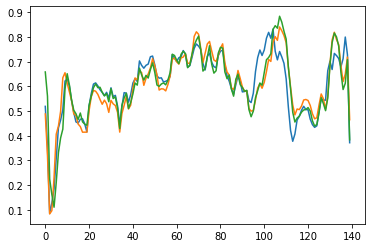

In [ ]:
# Visualizing normal patterns for few records
plt.plot(normal_train_data[0])
plt.plot(normal_train_data[1])
plt.plot(normal_train_data[2])

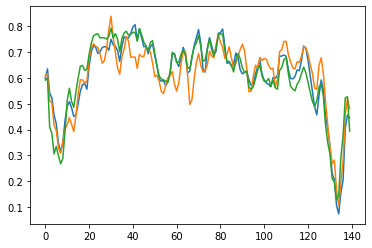

In [ ]:
# Visualizing anamoly patterns for few records
plt.plot(anamoly_train_data[0])
plt.plot(anamoly_train_data[1])
plt.plot(anamoly_train_data[2])

### Modeling

In [ ]:
# defining the autoencoder
class Autoencoder(Model):
  def __init__(self):
    super(Autoencoder, self).__init__()
    self.encoder = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu'),   
        tf.keras.layers.Dense(32, activation='relu'), 
        tf.keras.layers.Dense(16, activation='relu'), 
        tf.keras.layers.Dense(8, activation='relu')                              
    ])

    self.decoder = tf.keras.Sequential([
        tf.keras.layers.Dense(16, activation='relu'), 
        tf.keras.layers.Dense(32, activation='relu'), 
        tf.keras.layers.Dense(64, activation='relu'), 
        tf.keras.layers.Dense(140, activation='sigmoid') 
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded


In [ ]:
# intantiate and compile the model
model = Autoencoder()

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, mode='min')

model.compile(optimizer = 'adam', loss = 'mae')

In [ ]:
history = model.fit(normal_train_data, normal_train_data,
                    epochs = 50,
                    batch_size = 128,
                    validation_data = (train_df_scaled.iloc[:,1:],train_df_scaled.iloc[:,1:]),
                    shuffle = True,
                    callbacks = [early_stopping])

Epoch 1/50
19/19 [==============================] - 2s 50ms/step - loss: 0.1340 - val_loss: 0.1141
Epoch 2/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0948 - val_loss: 0.0843
Epoch 3/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0581 - val_loss: 0.0754
Epoch 4/50
19/19 [==============================] - 0s 8ms/step - loss: 0.0477 - val_loss: 0.0745
Epoch 5/50
19/19 [==============================] - 0s 8ms/step - loss: 0.0461 - val_loss: 0.0735
Epoch 6/50
19/19 [==============================] - 0s 8ms/step - loss: 0.0456 - val_loss: 0.0725
Epoch 7/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0445 - val_loss: 0.0725
Epoch 8/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0448 - val_loss: 0.0720
Epoch 9/50
19/19 [==============================] - 0s 8ms/step - loss: 0.0450 - val_loss: 0.0702
Epoch 10/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0435 - val_loss: 0.0665
Epoch 11/50
19/19 

In [ ]:
# get the decoded output on test data for normal data
encoder_out = model.encoder(normal_test_data).numpy()
decoder_out = model.decoder(encoder_out).numpy()

In [ ]:
encoder_out.shape, decoder_out.shape

((599, 8), (599, 140))

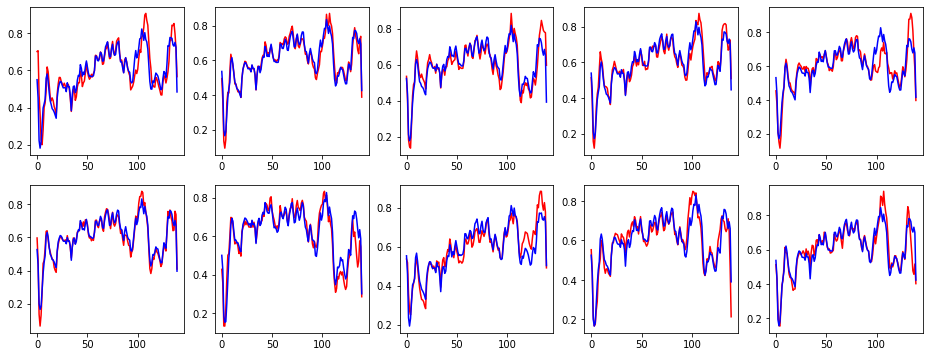

In [ ]:
# plot the decoded results against the actual value for a data point
fig, ax = plt.subplots(2,5, figsize = (16,6))
ax = ax.ravel()

for i in range(len(ax)):
  ax[i].plot(normal_test_data[i],'r')
  ax[i].plot(decoder_out[i],'b')

For the normal data we can see from the plots that the Blue lines in the plots, which are decoded outputs match nearly to the Red lines that are the actual ones.

In [ ]:
# get decoded outputs on test data for anamoly data
encoder_out_ana = model.encoder(anamoly_test_data).numpy()
decoder_out_ana = model.decoder(encoder_out_ana).numpy()

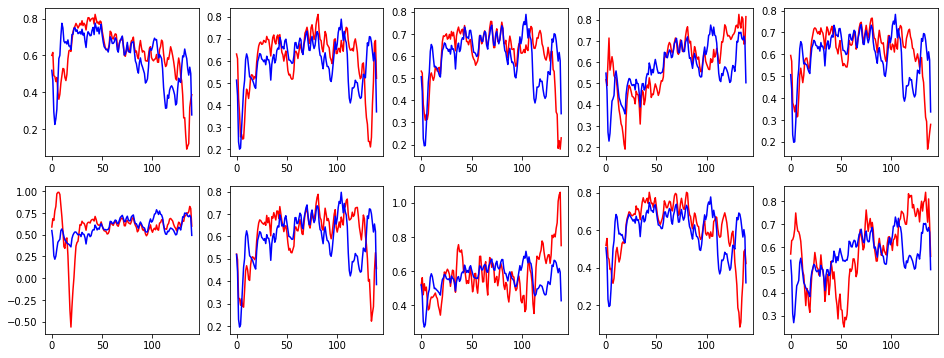

In [ ]:
# plot the decoded results against the actual value for a data point for anamoly data
fig, ax = plt.subplots(2,5, figsize = (16,6))
ax = ax.ravel()

for i in range(len(ax)):
  ax[i].plot(anamoly_test_data[i],'r')
  ax[i].plot(decoder_out_ana[i],'b')

For the anamoly data we can see from the plots that the actual and decoded values are more far apart compared to the plots for the normal data.

**Reconstruction Errors**

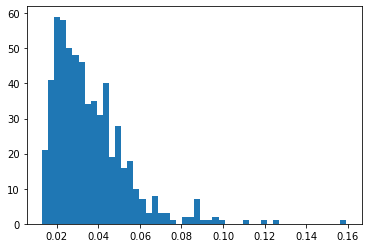

In [ ]:
# calculating resonstruction errors for normal data on test data
reconstruction_normal = model.predict(normal_test_data)
loss = tf.keras.metrics.mae(reconstruction_normal, normal_test_data)

plt.hist(loss, bins = 50);

For the normal data points the reconstruction errors for majority of that are less than 0.05, while there are few data points data have higher reconstruction values than 0.05.

In [ ]:
np.mean(loss)

0.03586931245151376

In [ ]:
np.std(loss)

0.017726092758365685

Bases on the reconstruction errors, we can calculate the threhold value for classifying data points as normal or anamoly. The threshold value can be set based on the business requirements.

In [ ]:
# setting threshold 
threshold = np.mean(loss) + 2* np.std(loss)
threshold

0.07132149796824513

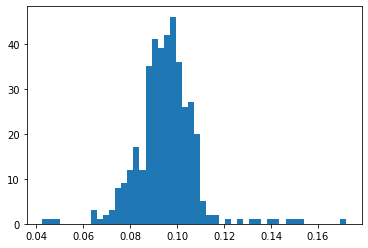

In [ ]:
# calculating resonstruction errors for anamoly data on test data
reconstruction_anamoly = model.predict(anamoly_test_data)
loss_anamoly = tf.keras.metrics.mae(reconstruction_anamoly, anamoly_test_data)

plt.hist(loss_anamoly, bins = 50);

For the anamoly data, we can see that the reconstrution errors are very different from the normal data, where majority of the data have the error greater thatn 0.05. 

In [ ]:
np.mean(loss_anamoly)

0.0951151893330376

In [ ]:
np.std(loss_anamoly)

0.012841728219920061

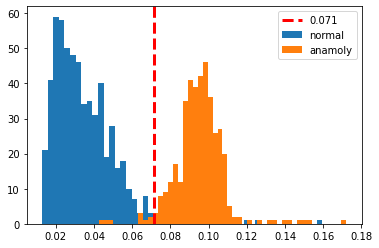

In [ ]:
# plot reconstruction error of normal against the abnormal
plt.hist(loss, bins=50, label = "normal")
plt.hist(loss_anamoly, bins=50, label = "anamoly")
plt.axvline(threshold, color = 'r', linewidth = 3, linestyle='dashed', label = f'{threshold:.3f}')
plt.legend(loc = 'upper right')
plt.show()

From the comparison of reconstrution errors for normal and anamoly data, we can see that our model is performing very good with a good separation between the two classes.

**Evaluation**

In [ ]:
# calculate reconstruction errors on entire test data
reconstruction_test = model.predict(test_df_scaled.iloc[:,1:])
loss_test = tf.keras.metrics.mae(reconstruction_test, test_df_scaled.iloc[:,1:]).numpy()

In [ ]:
# converting to normal or anamoly based on the threshold value
# 1 indicating normal and 0 anamoly
pred_labels = np.where(loss_test > threshold, 0 , 1)

In [ ]:
# convert actual test labels to normal or anamoly
test_labels = np.where(test_labels > 1, 0, 1)

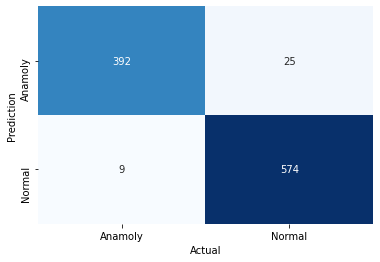

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(pred_labels, test_labels)
sns.heatmap(conf_mat, annot = True, cbar = False, cmap = 'Blues', fmt='.4g',
            xticklabels = [ 'Anamoly','Normal'], yticklabels =['Anamoly','Normal'] )
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.show()